### Required Imports

In [1]:
import pandas as pd;
import numpy as np;
from sklearn import metrics
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split;
import warnings
from sklearn.linear_model import LinearRegression;
warnings.filterwarnings('ignore')

### Reading csv file for DataSet

In [2]:
df = pd.read_csv('real_estate.csv', na_values=['Nan','na','NaN','','-','--','null','n/a','N/A'])
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Checking null values

In [3]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## Analysis of Data

In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


## outlier detection

In [7]:
df.skew()

No                                        0.000000
X1 transaction date                      -0.150572
X2 house age                              0.382926
X3 distance to the nearest MRT station    1.888757
X4 number of convenience stores           0.154607
X5 latitude                              -0.438598
X6 longitude                             -1.219591
Y house price of unit area                0.599853
dtype: float64

In [8]:
df_mrt = df['X3 distance to the nearest MRT station']
print(df_mrt.quantile(0.25))
print(df_mrt.quantile(0.5))
print(df_mrt.quantile(0.75))

289.3248
492.2313
1454.279


In [9]:
df_mrt.describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: X3 distance to the nearest MRT station, dtype: float64

In [10]:
Q1 = df_mrt.quantile(0.25)
Q3 = df_mrt.quantile(0.75)
IQR = Q3 - Q1

In [11]:
index = df[(df_mrt >= Q3)|(df_mrt <= Q1)].index
df.drop(index, inplace=True)
df.shape

(199, 8)

In [12]:
df.skew()

No                                        0.095778
X1 transaction date                      -0.206520
X2 house age                              0.159923
X3 distance to the nearest MRT station    1.188094
X4 number of convenience stores          -0.014916
X5 latitude                              -0.641504
X6 longitude                             -0.676925
Y house price of unit area                0.389424
dtype: float64

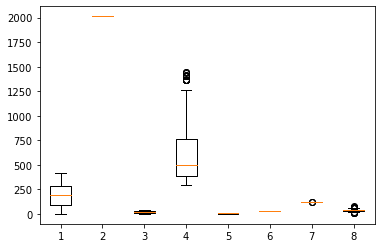

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(df)
plt.show()

array([[<AxesSubplot:title={'center':'No'}>,
        <AxesSubplot:title={'center':'X1 transaction date'}>,
        <AxesSubplot:title={'center':'X2 house age'}>],
       [<AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>,
        <AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>],
       [<AxesSubplot:title={'center':'X6 longitude'}>,
        <AxesSubplot:title={'center':'Y house price of unit area'}>,
        <AxesSubplot:>]], dtype=object)

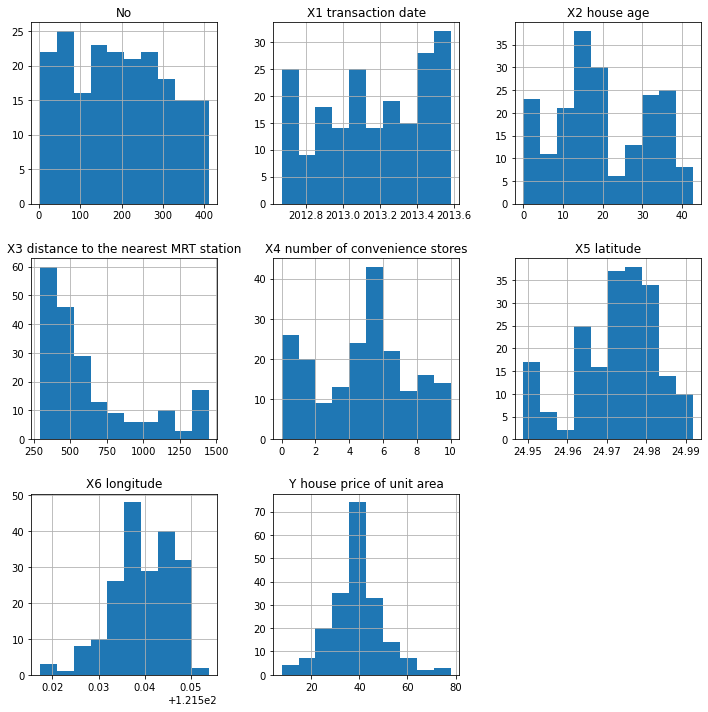

In [14]:
df.hist(figsize=(12,12))

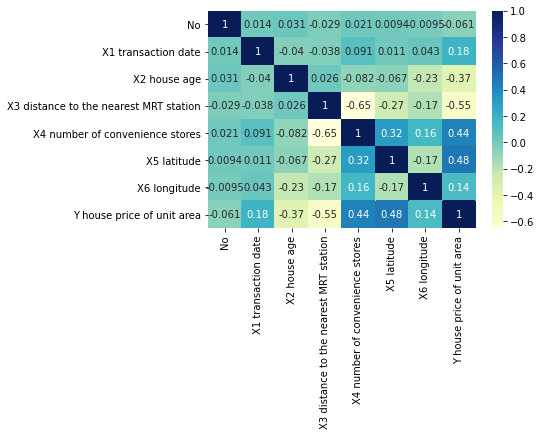

In [15]:
import seaborn as sb
import matplotlib.pyplot as mp
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [16]:
from sklearn.preprocessing import minmax_scale
scaled_df = minmax_scale(df)
scaled_df.shape

(199, 8)

### Feature Engineering and spliting train and test data

In [17]:
y = df[['Y house price of unit area']]
X_ = df.drop('Y house price of unit area', axis=1)

In [18]:
# X = X_.drop(['X1 transaction date','No','X2 house age','X3 distance to the nearest MRT station'], axis=1)
# X = X_
X = X_.drop(['No', 'X1 transaction date'], axis=1)
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
1,19.5,306.5947,9,24.98034,121.53951
2,13.3,561.9845,5,24.98746,121.54391
3,13.3,561.9845,5,24.98746,121.54391
4,5.0,390.5684,5,24.97937,121.54245
6,34.5,623.4731,7,24.97933,121.53642


In [19]:
X_train, X_test1, y_train, y_test1 = train_test_split(X,y,test_size=0.01)
X_train1,X_test,y_train1,y_test = train_test_split(X,y,test_size=0.10)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.08)

## Creating model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation of model

In [21]:
# regression coefficients
print('Coefficients: ', model.coef_)

Coefficients:  [[-2.89044013e-01 -1.45031830e-02  1.38149075e-02  3.82609807e+02
   1.11754308e+02]]


In [22]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))

Variance score: 0.7719521298445866


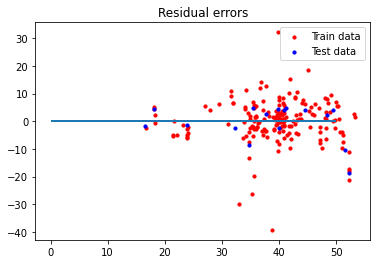

In [23]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "red", s = 10, label = 'Train data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [24]:
print(model.predict(X_test).shape)
print(y_test.shape)
print(type(model.predict(X_test)))
print(type(y_test))

(16, 1)
(16, 1)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [25]:
y_test['predicted'] = model.predict(X_test);

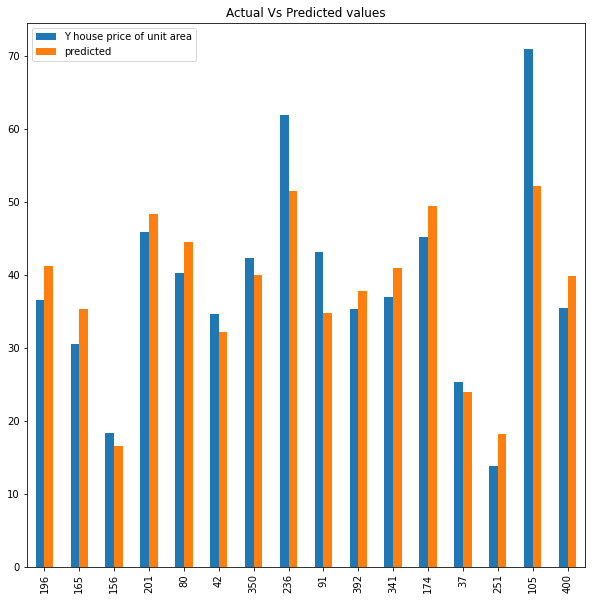

In [26]:
y_test.plot(kind="bar",figsize=(10,10))
plt.title("Actual Vs Predicted values")
plt.show()

In [27]:
y_p = model.predict(X_test)

In [28]:
y_t = y_test[['Y house price of unit area']]
print('Training Score', model.score(X_train, y_train))
print('Testing Score', model.score(X_test, y_t))

Training Score 0.5006309169098913
Testing Score 0.7719521298445866


In [29]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_t,y_p))
print('Mean Squared Error',metrics.mean_squared_error(y_t,y_p))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_t,y_p)))

Mean Absolute Error 5.055898731600337
Mean Squared Error 43.29345394169684
Root Mean Squared Error 6.57977613157901
